## Marketing Machine Learning Models
### Notebook by Kymberly Ayodeji

### Step 0: Install Libraries and Packages

In [1]:
# Numerical 
import pandas as pd
import numpy as np

# Import Machine Learning libraries
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

# Graphical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Load Data
- 1.1 Load data set from pickle file
- 1.2 Identify features and target
  
  Note: To view the pre-processing and exploratory data analysis of the data, open the eda.ipynb file in this folder

In [2]:
# 1.1 Load data
features_df = pd.read_pickle("artifacts/ml_dataset_df.pkl")
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23570 entries, 1 to 23570
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        23570 non-null  int64  
 1   frequency      23570 non-null  int64  
 2   monetary       23570 non-null  float64
 3   duration       23570 non-null  int64  
 4   avg_price      23570 non-null  float64
 5   max_price      23570 non-null  float64
 6   spend_total    23570 non-null  float64
 7   n_days_spend?  23570 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.6 MB


In [3]:
# 1.2 Identity Features (X) and target (y)
X = features_df[['recency', 'frequency','monetary','duration', 'avg_price', 'max_price']]
y = features_df['spend_total']

## Step 2: Build Models
- 2.1 Regression model 
  - a: using XGBoost to predict price
  - b: hyperparameter tuning to find optimal parameters for the XGBoost model
- 2.2 Classification model to predict 

In [7]:
# 2.1a Instantiate XGBoost model
xgb_spec = XGBRegressor(objective="reg:squarederror", random_state=522)
# Parameters to tune using GridSearchCV
xgb_model = GridSearchCV(estimator=xgb_spec,
                        param_grid=dict(
                            learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2],
                            min_split_loss = [0.1, 1, 3, 5, 8, 10],
                            sampling_method=['uniform']
                            ),
                        scoring = 'neg_mean_absolute_error',
                        refit = True,
                        cv = 5
                        )

In [8]:
# 2.1b Fit the model with the data
xgb_model.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=522, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'min_split_loss': [0.1, 1, 3, 5, 8, 10],
                         'sampling_method': ['uniform']},
             scoring='neg_mean_absolute_error')

In [9]:
# Metrics
print(f"Best Score: {xgb_model.best_score_}")
print(f"Best Parameters: {xgb_model.best_params_}")

Best Score: -15.658693397391332
Best Parameters: {'learning_rate': 0.05, 'min_split_loss': 3, 'sampling_method': 'uniform'}


In [10]:
# Store Predictions
regression_predictions = xgb_model.predict(X)

<Axes: ylabel='spend_total'>

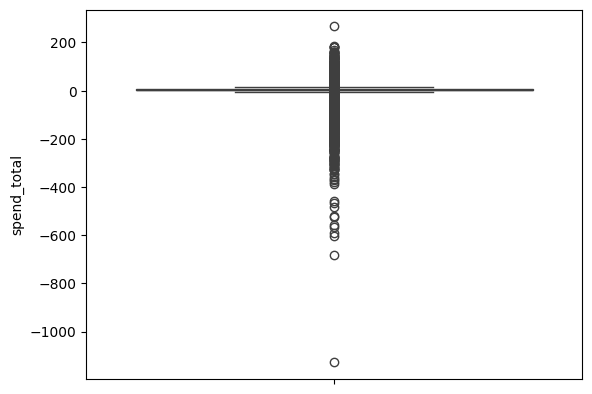

In [11]:
# Compare Predictions
residual = regression_predictions - features_df['spend_total']
sns.boxplot(residual)

In [12]:
residual.mean()

-0.03294622019208949

In [13]:
print(f"Range: ${residual.min():.2f} - ${residual.max():.2f}, \
      Count {len(residual)}, \
      Q1:{ np.percentile(residual, 25):.2f}, \
      median:{ np.percentile(residual, 50):.2f},\
      Q3: { np.percentile(residual, 75):.2f}"
    )

Range: $-1127.88 - $266.94,       Count 23570,       Q1:1.78,       median:2.27,      Q3: 6.78
